In [1]:
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import csv
import pickle

In [2]:
"""Basis and assumptions
since we do not require all the information presented in the picture.. and have computational limitations,
we will limit the images so that it captures just the lane and the lane rails, and compress the picture by
skipping some of the information. It is assumed that an equivalent amount of information will be gained even
with dropping some of the information in the jpg file.
"""

'Basis and assumptions\nsince we do not require all the information presented in the picture.. and have computational limitations,\nwe will limit the images so that it captures just the lane and the lane rails, and compress the picture by\nskipping some of the information. It is assumed that an equivalent amount of information will be gained even\nwith dropping some of the information in the jpg file.\n'

In [3]:
csv_path = "./driving_log.csv"

In [4]:
def load_image(data):
    img = plt.imread(data)
    return img

In [5]:
random.randint(0,5000)

3061

In [6]:
# import data from csv
data = []
with open(csv_path) as file:
    reader = csv.reader(file)
    for i in reader:
        data.append(i)

In [7]:
csv_size = len(data)
print("%d data points imported" % csv_size)

10102 data points imported


In [8]:
data[0][0]

'C:\\Users\\aselius\\dev\\CarND-Behavioral-Cloning-P3\\IMG\\center_2017_02_13_21_49_07_351.jpg'

In [9]:
test = load_image(data[0][0])

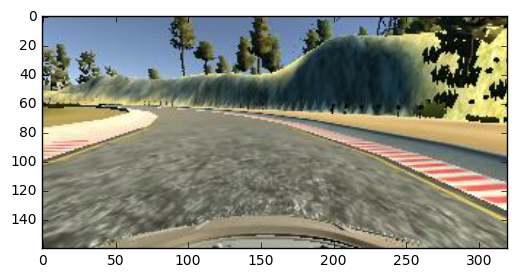

In [10]:
imgplot = plt.imshow(test)
plt.show()

In [11]:
print('length of image is %d and height is %d' % (test.shape[1], test.shape[0]))

length of image is 320 and height is 160


In [12]:
crop_test_red = test[65:135:4,0:-1:4,0]
crop_test_green = test[65:135:4,0:-1:4,1]
crop_test_blue = test[65:135:4,0:-1:4,2]

In [13]:
crop_test_red.shape

(18, 80)

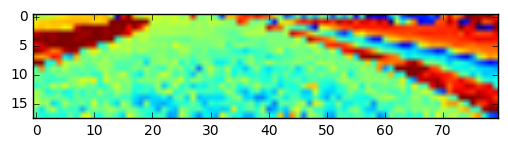

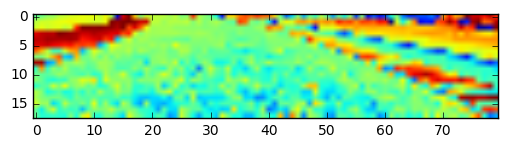

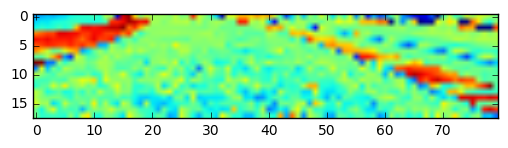

In [14]:
plt.figure()
plt.imshow(crop_test_red)
plt.figure()
plt.imshow(crop_test_green)
plt.figure()
plt.imshow(crop_test_blue)
plt.show()

In [15]:
# seems like red channel gives the best distinction between the lane and the lane markings or rails.

In [16]:
print(crop_test_red.flatten())
print(len(crop_test_red.flatten()))

[142 146 156 ..., 106  69  58]
1440


In [17]:
# comapring the different camera angles

In [18]:
test_angle1 = load_image(data[0][0])
test_angle1 = test_angle1[65:135:4,0:-1:4,0]
test_angle2 = load_image(data[0][1])
test_angle2 = test_angle2[65:135:4,0:-1:4,0]
test_angle3 = load_image(data[0][2])
test_angle3 = test_angle3[65:135:4,0:-1:4,0]

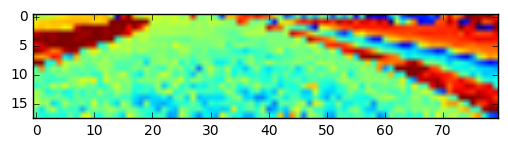

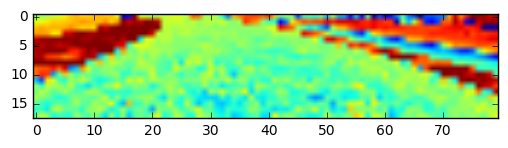

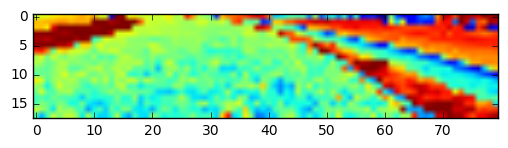

In [19]:
plt.figure()
plt.imshow(test_angle1)
plt.figure()
plt.imshow(test_angle2)
plt.figure()
plt.imshow(test_angle3)
plt.show()

In [20]:
# they look significantly different enough, and we would have to make use of at least the left and right angles for maximum info

In [21]:
features = ()
labels = ()

def crop_image(image):
    """crops the image down to 18x80

    and uses the red channel from rgb
    """
    image = image[65:135:4, 0:-1:4, 0]
    return image

def flatten_image(image):
    """flattens the image data into one list
    """
    image = image.flatten().tolist()
    return image

def import_image(data_row_column):
    """imports the image data from path data
    """
    img = plt.imread(data_row_column.strip())
    return img

In [22]:
## flatten images
data = data[:100]
for i in tqdm(range(int(len(data))), unit='items'):
    for j in range(3):
        cropped_image = crop_image(import_image(data[i][j]))
        features += (flatten_image(cropped_image),)
        labels += (float(data[i][3]),)

100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 313.19items/s]


In [23]:
features = np.array(features).reshape(len(features), 18, 80, 1)
print("shape of features array is", features.shape)
labels = np.array(labels)
print("shape of labels array is", labels.shape)

shape of features array is (300, 18, 80, 1)
shape of labels array is (300,)


In [24]:
from sklearn.model_selection  import train_test_split

# split the dataset into training data and test data
X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.20,
    random_state=42)

# split the training set into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    test_size=0.20,
    random_state=42)

In [25]:
## output the result (X_train, X_val, y_train, y_val) in pickle for further analysis
output_file = 'cam_data.pickle'
iterate = True

while iterate:
    if not os.path.isfile(output_file):
        print('Pickle file not found. Saving data to pickle file.')
        try:
            with open(output_file, 'wb') as pfile:
                pickle.dump(
                    {
                        'train_data': X_train,
                        'train_label': y_train,
                        'valid_data': X_valid,
                        'valid_label': y_valid,
                        'test_data': X_test,
                        'test_label': y_test
                    },
                    pfile, pickle.HIGHEST_PROTOCOL)
        except Exception as e:
            print('Unable to save pickle file :', e)
            raise
        print('Save complete')
        iterate = False
    else:
        print('pickle file with default output name found. please enter an alternate name')
        output_file = input("Alternate name: ")


Pickle file not found. Saving data to pickle file.
Save complete
